In [8]:
import xarray as xr
import numpy as np
import netCDF4 as nc
import datetime

In [100]:
# Getting all the values from netcdf file and storing it in single list
p=[]
for year in range(91,92):
    for mon in ['jan', 'Feb','Mar','Apr','May','Jun', 'July','Aug', 'Sep', 'Oct','Nov','Dec']:
        file = 'Kriging_'+str(mon)+str(year)+'_RasterToNetCDF.nc'
        pcp = xr.open_dataset(r'D:\research projects\project_1_river flow projection\literature_review\SWAT with ML, ANN\temp_nc\1991'\
                              +'\\'+file)
        p.append(pcp.ppt.to_numpy())
        
# Then we now recreate netcdf file
n_mon = 12;
unout = 'days since 2000-01-01 00:00:00'

ny, nx = (21, 26)
lon = np.linspace(71.666033,73.8327,nx);
lat = np.linspace(34.082967,32.349633,ny);


dataout = np.array(p)

datesout = [datetime.datetime(1991,1 + i_mon,1) for i_mon in range(n_mon)]; # create datevalues

ncout = Dataset('test_2.nc','w','NETCDF3');
ncout.createDimension('lon',nx);
ncout.createDimension('lat',ny);
ncout.createDimension('time',n_mon);
lonvar = ncout.createVariable('lon','float32',('lon'))
lonvar[:] = lon

latvar = ncout.createVariable('lat','float32',('lat'))
latvar[:] = lat

timevar = ncout.createVariable('time','float64',('time'))
timevar.setncattr('units',unout)
timevar[:]=date2num(datesout,unout)

pcp = ncout.createVariable('pcp','float32',('time','lat','lon'))
pcp.setncattr('units','mm')
pcp[:] = dataout

ncout.close();

<AxesSubplot:xlabel='time'>

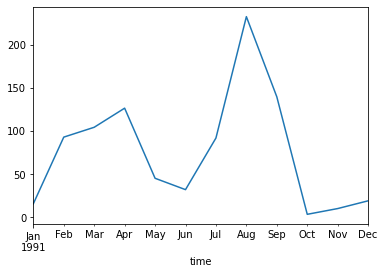

In [108]:
xr.open_dataset(r'test_2.nc').pcp.sel(lon= '72.35937', lat = '33.4763', method='nearest').to_dataframe().pcp.plot()